In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [2]:
def bloch(var, t, T, b1, B1, phi, dw, T1, T2, M0):
    Mx, My, Mz = var
    R1 = 1/T1
    R2 = 1/T2
        
    gamma = 1
    tw = 1
    nz = 1
    B = B1(t,b1,tw,nz)
    
    dMxdt = My*dw -Mz*gamma*B*np.sin(phi) -R2*Mx
    dMydt = Mz*gamma*B*np.cos(phi) -Mx*dw -R2*My
    dMzdt = Mx*B*np.sin(phi) -My*B*np.cos(phi) -(Mz-M0)*R1
    
    return [dMxdt, dMydt, dMzdt]


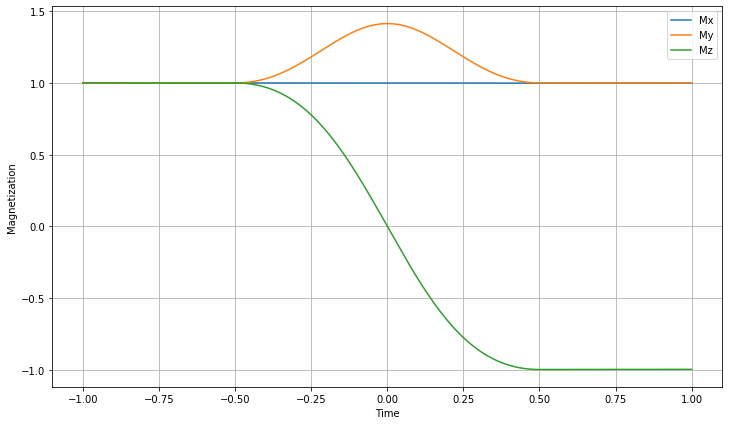

In [21]:
t0 = -1
t1 = 1

ts = np.linspace(t0, t1, 10001)
M_init = [1,1,1]


T1 = 1000
T2 = 1000
M0 = 1 
b1 = 2.664
phi = 0
dw = 0

def B1_sinc(t, b1, tw, nz):
    trf = nz*tw
    if(t==0):
        return 0
    elif(-0.5*trf <= t  and t <= 0.5*trf):
        return b1*np.sin(2*np.pi*t/tw)/(2*np.pi*t/tw)
    else:
        return 0

res = np.array(odeint(bloch, M_init, ts, args=(t1, b1, B1_sinc, phi, dw, T1, T2, M0)))


plt.figure(figsize=(12,7))
plt.plot(ts, res[:,0], label="Mx")
plt.plot(ts, res[:,1], label="My")
plt.plot(ts, res[:,2], label="Mz")
plt.xlabel("Time")
plt.ylabel("Magnetization")
plt.legend()
plt.grid()
plt.show()

In [51]:
def blochG(var, t, x, T, b1, B1, phi, dw, T1, T2, M0, Gstr):
    Mx, My, Mz = var
    R1 = 1/T1
    R2 = 1/T2
        
    gamma = 1
    tw = 1
    nz = 1
    trf = nz*tw
    dx = 2
    B = B1(t,b1,tw,nz)
    G = Gstr * 2*np.pi/(gamma*tw*dx)
    
    if(-0.5*trf <= t  and t <= 0.5*trf):
        dOmega = gamma*G*x
    else:
        dOmega = dw
    
    dMxdt = My*dOmega -Mz*gamma*B*np.sin(phi) -R2*Mx
    dMydt = Mz*gamma*B*np.cos(phi) -Mx*dOmega -R2*My
    dMzdt = Mx*B*np.sin(phi) -My*B*np.cos(phi) -(Mz-M0)*R1
    
    return [dMxdt, dMydt, dMzdt]


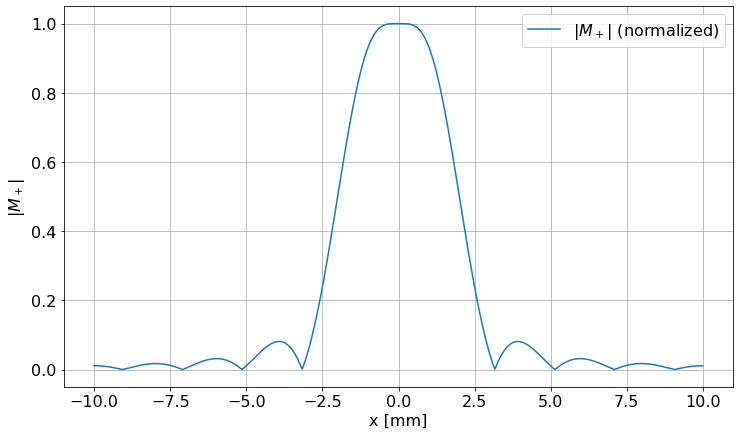

In [214]:
x0 = -10
x1 = 10

M_init = [0,0,1]
T1 = 1000
T2 = 1000
M0 = 1 
b1 = 2.664 #3.02
phi = 0
dw = 0

def B1_sinc(t, b1, tw, nz):
    trf = nz*tw
    if(t==0):
        return 0
    elif(-0.5*trf < t  and t < 0.5*trf):
        return b1*np.sin(2*np.pi*t/tw)/(2*np.pi*t/tw)
    else:
        return 0

ts = np.linspace(-1,1,1000)
xs = np.linspace(x0,x1,1001)
tp = 0.5
Mps = []

for x in xs:
    res = np.array(odeint(blochG, M_init, ts, args=(x, t1, b1, B1_sinc, phi, dw, T1, T2, M0, 1)))
    Mplus = res[:,0] + 1j*res[:,1]
    Mps.append(np.absolute(Mplus[749]))

ft = 16
plt.figure(figsize=(12,7))
plt.plot(xs, Mps/(np.max(Mps)), label=r"|$M_+$| (normalized)")
plt.xlabel("x [mm]", fontsize=ft)
plt.ylabel(r"|$M_+$|", fontsize=ft)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.legend(fontsize=ft)
plt.grid()
plt.savefig("mag_profile.png", dpi=200)
plt.show()

In [171]:
def blochG2(var, t, x, T, b1, B1, phi, dw, T1, T2, M0, Gstr, nz_, tw_, offset=0):
    Mx, My, Mz = var
    R1 = 1/T1
    R2 = 1/T2
        
    gamma = 1
    tw = tw_
    nz = nz_
    trf = nz*tw
    dx = 2
    B = B1(t,b1,tw,nz)
    G = Gstr * 2*np.pi/(gamma*tw*dx)
    
    if(-0.5*trf <= t  and t <= 0.5*trf):
        dOmega = gamma*G*(x-offset)
    else:
        dOmega = dw
    
    dMxdt = My*dOmega -Mz*gamma*B*np.sin(phi) -R2*Mx
    dMydt = Mz*gamma*B*np.cos(phi) -Mx*dOmega -R2*My
    dMzdt = Mx*B*np.sin(phi) -My*B*np.cos(phi) -(Mz-M0)*R1
    
    return [dMxdt, dMydt, dMzdt]

In [208]:
def slice_magnetization(nz, tw, Gstr, offset=0):
    x0 = -10
    x1 = 10

    M_init = [0,0,1]
    T1 = 1000
    T2 = 1000
    M0 = 1 
    b1=2.664
    
    ## For checking new b1 parameters:
    '''
    if nz==1:
        if tw==0.5:
            b1 = 5.3 
        elif tw==0.75:
            b1 = 3.53
        elif tw==1:
            b1 = 2.664
        elif tw==1.25:
            b1 = 2.12
        elif tw==1.5:
            b1 = 1.77
    if tw==0.1:
        if nz==5:
            b1 = 30.0
        if nz==10:
            b1 = 31.9
        if nz==20:
            b1 = 31.5
    '''    

    phi = 0
    dw = 0
    trf = nz*tw

    def B1_sinc(t, b1, tw, nz):
        trf = nz*tw
        if(t==0):
            return 0
        elif(-0.5*trf < t  and t < 0.5*trf):
            return b1*np.sin(2*np.pi*t/tw)/(2*np.pi*t/tw)
        else:
            return 0
    
    t0 = -1
    t1 = 1
    ts = np.linspace(t0,t1,1000)
    xs = np.linspace(x0,x1,1001)
    Mps = []
    
    if offset != 0:
        for x in xs:
            res = np.array(odeint(blochG2, M_init, ts, args=(x, t1, b1, B1_sinc, phi, dw, T1, T2, M0, Gstr, nz, tw, offset)))
            Mplus = res[:,0] + 1j*res[:,1]
            #Mps.append(np.absolute(Mplus[749]))
            idx = int(499+np.floor(500/(2/trf)))
            Mps.append(np.absolute(Mplus[idx]))
    else:  
        for x in xs:
            res = np.array(odeint(blochG2, M_init, ts, args=(x, t1, b1, B1_sinc, phi, dw, T1, T2, M0, Gstr, nz, tw)))
            Mplus = res[:,0] + 1j*res[:,1]
            #Mps.append(np.absolute(Mplus[749]))
            idx = int(499+np.floor(500/(2/trf)))
            Mps.append(np.absolute(Mplus[idx]))
    
    return Mps, xs

In [199]:
def plot_profile(data, xs, tw, nz, Gstr, fig_name):
    plt.figure(figsize=(12,7))
    ft = 16
    for i, elem in enumerate(data):
        plt.plot(xs[i], elem/(np.max(elem)), label=r"$n_z = $" +str(nz[i]) + r"$, t_w = $" +str(tw[i]) + r", Gstr = " +str(Gstr[i]))
    plt.xlabel("x [mm]", fontsize=ft)
    plt.ylabel(r"|$M_+$|", fontsize=ft)
    plt.xticks(fontsize=ft)
    plt.yticks(fontsize=ft)
    plt.legend(fontsize=ft, loc="upper left")
    plt.grid()
    plt.savefig(fig_name, dpi=200)
    plt.show()

In [200]:
Mp_GS1, xs_GS1 = slice_magnetization(1,1,1)
Mp_GS2, xs_GS2 = slice_magnetization(1,1,2)
Mp_GS05, xs_GS05 = slice_magnetization(1,1,0.5)

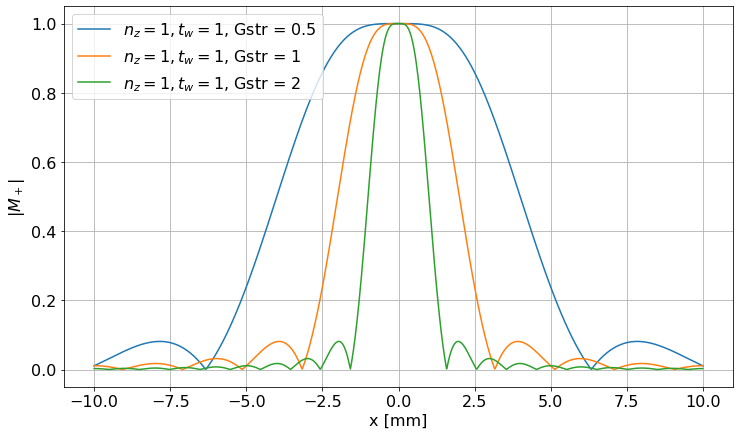

In [201]:
plot_profile([Mp_GS05, Mp_GS1, Mp_GS2], [xs_GS05, xs_GS1, xs_GS2], [1,1,1], [1,1,1], [0.5,1,2], "gradient.png")

In [202]:
Mp_GS1, xs_GS1 = slice_magnetization(1,1,1,1)
Mp_GS2, xs_GS2 = slice_magnetization(1,1,2,1)
Mp_GS05, xs_GS05 = slice_magnetization(1,1,0.5,1)

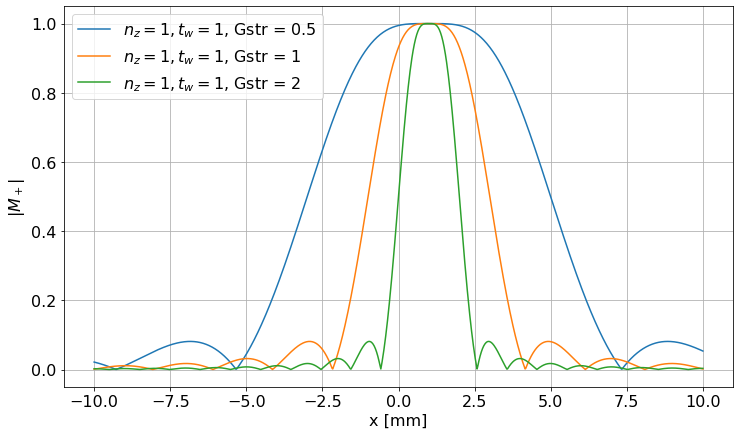

In [203]:
plot_profile([Mp_GS05, Mp_GS1, Mp_GS2], [xs_GS05, xs_GS1, xs_GS2], [1,1,1], [1,1,1], [0.5,1,2], "gradient_shifted")

In [209]:
Mp_tw05, xs_tw05 = slice_magnetization(1,0.5,1)
Mp_tw075, xs_tw075 = slice_magnetization(1,0.75,1)
Mp_tw1, xs_tw1 = slice_magnetization(1,1,1)
Mp_tw125, xs_tw125 = slice_magnetization(1,1.25,1)
Mp_tw15, xs_tw15 = slice_magnetization(1,1.5,1)

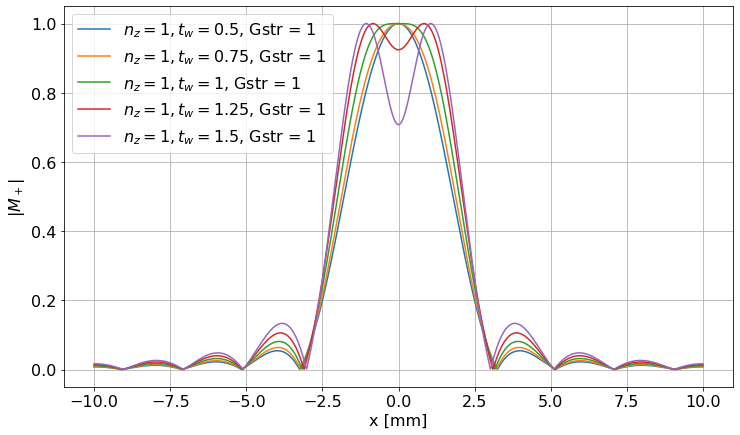

In [210]:
plot_profile([Mp_tw05,Mp_tw075,Mp_tw1,Mp_tw125,Mp_tw15], [xs_tw05,xs_tw075, xs_tw1, xs_tw125, xs_tw15], [0.5,0.75,1,1.25,1.5], [1,1,1,1,1], [1,1,1,1,1], "tw_varying.png")

In [187]:
tw = 0.1
#Mp_nz1, xs_nz1 = slice_magnetization(1,tw,1)
#Mp_nz2, xs_nz2 = slice_magnetization(2,tw,1)
Mp_nz5, xs_nz5 = slice_magnetization(5,tw,1)
Mp_nz10, xs_nz10 = slice_magnetization(10,tw,1)
Mp_nz20, xs_nz20 = slice_magnetization(20,tw,1)

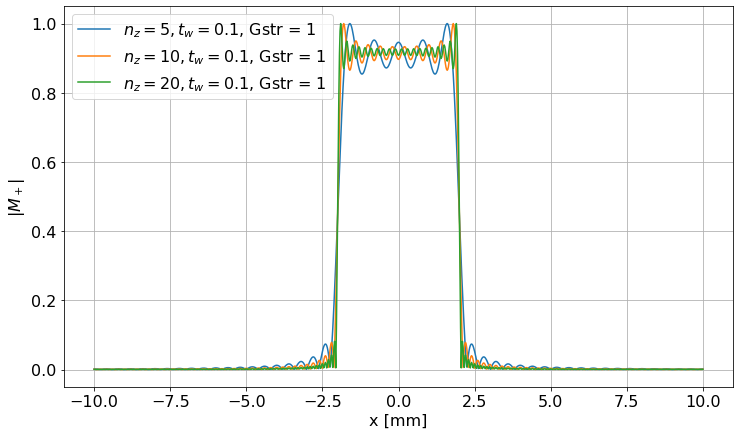

In [211]:
plot_profile([Mp_nz5, Mp_nz10, Mp_nz20], [xs_nz5, xs_nz10, xs_nz20], [tw,tw,tw], [5,10,20], [1,1,1],"nz_varying.png")